In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from nltk.corpus import stopwords
from sklearn.metrics import classification_report,accuracy_score, recall_score, precision_score,f1_score
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
#from alok_assignment_get_tweets_flask import get_data
from get_tweet_data import get_data
import warnings
warnings.filterwarnings("ignore")

In [56]:
def train_tweets(df):
    df = pd.DataFrame(retreived_tweets)
    df.head()
    display(df.head())
    df = df[['tweets','sentiment']]

    df['sentiment']=df['sentiment'].astype("category")

    train_X, test_X, train_y, test_y = train_test_split(df['tweets'],df['sentiment'],test_size=0.3,random_state=523)

    #nltk.download('stopwords')

    stop_words = stopwords.words('english')

    Tfidf_vect = TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
    Tfidf_vect.fit(train_X)
    train_X_Tfidf = Tfidf_vect.transform(train_X)
    test_X_Tfidf = Tfidf_vect.transform(test_X)

    acc_dict_train = {}
    acc_dict_test = {}

    # Classifier - Algorithm - SVM
    # fit the training dataset on the classifier
    SVM = svm.SVC(kernel='linear')
    SVM.fit(train_X_Tfidf,train_y)

    # predict the labels on train dataset
    pred_train1 = SVM.predict(train_X_Tfidf)

    # predict the labels on validation dataset
    pred_test1 = SVM.predict(test_X_Tfidf)

    # Use accuracy_score function to get the accuracy
    train_rmse1 = accuracy_score(train_y, pred_train1)*100
    test_rmse1 = accuracy_score(test_y, pred_test1)*100
    print("SVM Accuracy Score on Train set -> ", train_rmse1)
    print("SVM Accuracy Score on Validation set -> ", test_rmse1)

    acc_dict_test['SVM'] = accuracy_score(test_y, pred_test1)*100
    acc_dict_train['SVM'] = accuracy_score(train_y, pred_train1)*100


    print(classification_report(test_y,pred_test1))

    

    metric = collections.defaultdict(list)
    metric['SVM'].append(precision_score(train_y, pred_train1,average='macro'))
    metric['SVM'].append(recall_score(train_y, pred_train1,average='macro'))
    metric['SVM'].append(f1_score(train_y, pred_train1,average='macro'))

    # Classifier - Algorithm - Random Forest Algorithm

    #Import Random Forest Model
    
    Rforest = RandomForestClassifier(n_estimators=100)

    # fit the training dataset on the classifier
    Rforest.fit(train_X_Tfidf,train_y)

    # predict the labels on train dataset
    pred_train1 = Rforest.predict(train_X_Tfidf)

    # predict the labels on validation dataset
    pred_test1 = Rforest.predict(test_X_Tfidf)

    train_rmse2=accuracy_score(train_y, pred_train1)*100
    test_rmse2 =accuracy_score(test_y, pred_test1)*100


    # Use accuracy_score function to get the accuracy
    print("RandomForest Accuracy Score on Train set -> ",train_rmse2 )
    print("RandomForest Accuracy Score on Validation set -> ",test_rmse2)

    acc_dict_test['RF'] = accuracy_score(test_y, pred_test1)*100
    acc_dict_train['RF'] = accuracy_score(train_y, pred_train1)*100

    print(classification_report(test_y,pred_test1))

    metric['RF'].append(precision_score(train_y, pred_train1,average='macro'))
    metric['RF'].append(recall_score(train_y, pred_train1,average='macro'))
    metric['RF'].append(f1_score(train_y, pred_train1,average='macro'))

    # fit the training dataset on the NB classifier
    Naive = naive_bayes.MultinomialNB()
    Naive.fit(train_X_Tfidf,train_y)

    # predict the labels on train dataset
    pred_train = Naive.predict(train_X_Tfidf)

    # predict the labels on validation dataset
    pred_test = Naive.predict(test_X_Tfidf)

    train_rmse3=accuracy_score(train_y, pred_train)*100
    test_rmse3=accuracy_score(test_y, pred_test)*100



    # Use accuracy_score function to get the accuracy
    print("Naive Bayes Accuracy Score on Train set -> ", train_rmse3)
    print("Naive Bayes Accuracy Score on Validation set -> ",test_rmse3)

    acc_dict_test['NB'] = accuracy_score(test_y, pred_test)*100
    acc_dict_train['NB'] = accuracy_score(train_y, pred_train)*100

    print(classification_report(test_y,pred_test1))

    metric['NB'].append(precision_score(train_y, pred_train,average='macro'))
    metric['NB'].append(recall_score(train_y, pred_train,average='macro'))
    metric['NB'].append(f1_score(train_y, pred_train,average='macro'))

    # Logistic Regression Algorithm
    # fit the training dataset on the classifier
    

    clf = LogisticRegression(random_state=0).fit(train_X_Tfidf,train_y)

    clf.score(train_X_Tfidf,train_y)

    # predict the labels on train dataset
    pred_train1 = clf.predict(train_X_Tfidf)

    # predict the labels on validation dataset
    pred_test1 = clf.predict(test_X_Tfidf)

    train_rmse4=accuracy_score(train_y, pred_train1)*100
    test_rmse4=accuracy_score(test_y, pred_test1)*100

    # Use accuracy_score function to get the accuracy
    print("Logistic Regression Accuracy Score on Train set -> ",train_rmse4 )
    print("Logistic Regression Accuracy Score on Validation set -> ",test_rmse4)

    acc_dict_test['LG'] = accuracy_score(test_y, pred_test1)*100
    acc_dict_train['LG'] = accuracy_score(train_y, pred_train1)*100


    print(classification_report(test_y,pred_test1))

    metric['LG'].append(precision_score(train_y, pred_train1,average='macro'))
    metric['LG'].append(recall_score(train_y, pred_train1,average='macro'))
    metric['LG'].append(f1_score(train_y, pred_train1,average='macro'))

    # Classifier - Algorithm - Decision Tree
    # fit the training dataset on the classifier
    
    Dtree = DecisionTreeClassifier(random_state=0)
    Dtree.fit(train_X_Tfidf,train_y)

    # predict the labels on train dataset
    pred_train1 = Dtree.predict(train_X_Tfidf)

    # predict the labels on validation dataset
    pred_test1 = Dtree.predict(test_X_Tfidf)

    train_rmse5=accuracy_score(train_y, pred_train1)*100
    test_rmse5=accuracy_score(test_y, pred_test1)*100

    # Use accuracy_score function to get the accuracy
    print("Decision tree Accuracy Score on Train set -> ",train_rmse5 )
    print("Decision tree Accuracy Score on Validation set -> ",test_rmse5)

    acc_dict_test['DT'] = accuracy_score(test_y, pred_test1)*100
    acc_dict_train['DT'] = accuracy_score(train_y, pred_train1)*100

    print(classification_report(test_y,pred_test1))

    metric['DT'].append(precision_score(train_y, pred_train1,average='macro'))
    metric['DT'].append(recall_score(train_y, pred_train1,average='macro'))
    metric['DT'].append(f1_score(train_y, pred_train1,average='macro'))

    tmp = pd.DataFrame(dict(metric),index=['precision','recall','f1'])
    display(tmp)
    tmp.plot.pie(subplots=True,figsize=(16,12),autopct='%1.1f%%',labels=None)
    plt.legend(labels=tmp.index,loc='best')

    ax=tmp.plot(kind='bar',figsize=(16,6),width=0.8)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height*100:.3}%', (x + width/2, y + height*1.02), ha='center')
    plt.show()

    
    var1 =(mean_squared_error([train_rmse1],[test_rmse1]))
    var2 =(mean_squared_error([train_rmse2],[test_rmse2]))
    var3 =(mean_squared_error([train_rmse3],[test_rmse3]))
    var4 = (mean_squared_error([train_rmse4],[test_rmse4]))
    var5 = (mean_squared_error([train_rmse4],[test_rmse4]))
    var1=np.sqrt(var1)
    var2=np.sqrt(var2)
    var3=np.sqrt(var3)
    var4=np.sqrt(var4)
    var5=np.sqrt(var5)
    print("RMSE of SVM",var1)
    print("RMSE of Random Forest",var2)
    print("RMSE of Naive Bayes",var3)
    print("RMSE of Logistic Regression",var4)
    print("RMSE of Decision Tree",var4)

    x = np.arange(5)  # the label locations
    width = 0.35

    fig,ax = plt.subplots(figsize=(14,8))

    #ax = plt.subplot(121)

    br = ax.bar(x-width/2,list(acc_dict_train.values()),width, label='train')
    br2 = ax.bar(x+width/2,list(acc_dict_test.values()),width, label='test')
    ax.set_xticks((0,1,2,3,4))
    ax.set_xticklabels(['SVM','RF','NB','LG','DT'])
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.4}%', (x + width/2, y + height*1.02), ha='center')
    ax.legend(loc='upper right')
    #fig.tight_layout()
    plt.show()
    
    return 

Authentication Success


,tweets,date,cleaned_tweets,sentiment_score,sentiment
0,Check out OnePlus 8/8 Pro Original 5V 6A Warp ...,2021-05-23 06:54:18,check out oneplus pro original warp charge cha...,0.188,positive
1,RT @TechnicalGuruji: #221​ Sunday Tech Masala ...,2021-05-23 05:35:57,sunday tech masala soon unboxing oneplus pubg URL,0.000,neutral
2,RT @TechWiser: Food for thought\n\nRedmi Note ...,2021-05-23 04:56:02,food for thought redmi note pro max mp moto g6...,0.000,neutral
3,"@AmanManderna @MaxWinebach Heyy, I was plannin...",2021-05-23 04:52:55,heyy i wa planning to buy a oneplus pro but do...,0.000,neutral
4,@Daniel_in_HD OnePlus 8 - Warp Charge 30T,2021-05-23 04:47:22,oneplus warp charge,0.000,neutral


SVM Accuracy Score on Train set ->  67.5
SVM Accuracy Score on Validation set ->  55.55555555555556
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.56      1.00      0.71        10
    positive       0.00      0.00      0.00         6

    accuracy                           0.56        18
   macro avg       0.19      0.33      0.24        18
weighted avg       0.31      0.56      0.40        18

RandomForest Accuracy Score on Train set ->  97.5
RandomForest Accuracy Score on Validation set ->  61.111111111111114
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.59      1.00      0.74        10
    positive       1.00      0.17      0.29         6

    accuracy                           0.61        18
   macro avg       0.53      0.39      0.34        18
weighted avg       0.66      0.61      0.51        18

Naive Bayes Accurac

,SVM,RF,NB,LG,DT
precision,0.225000,0.988095,0.225000,0.564103,0.988095
recall,0.333333,0.969697,0.333333,0.363636,0.969697
f1,0.268657,0.978066,0.268657,0.328283,0.978066


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


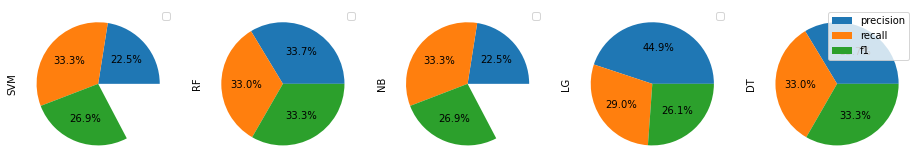

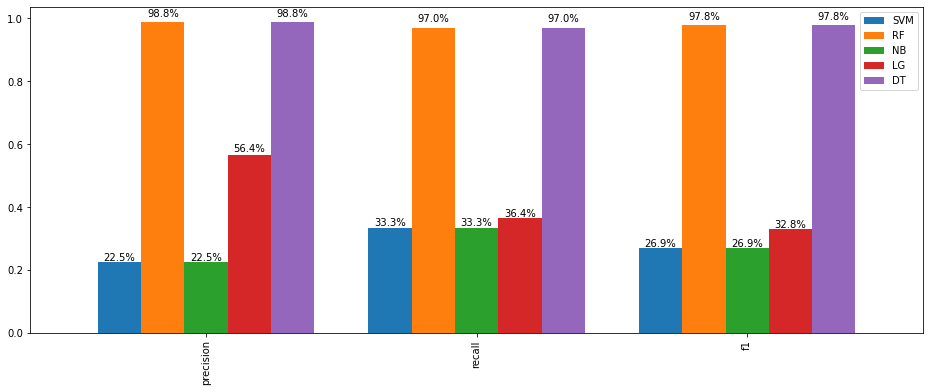

RMSE of SVM 11.944444444444443
RMSE of Random Forest 36.388888888888886
RMSE of Naive Bayes 11.944444444444443
RMSE of Logistic Regression 14.444444444444443
RMSE of Decision Tree 14.444444444444443


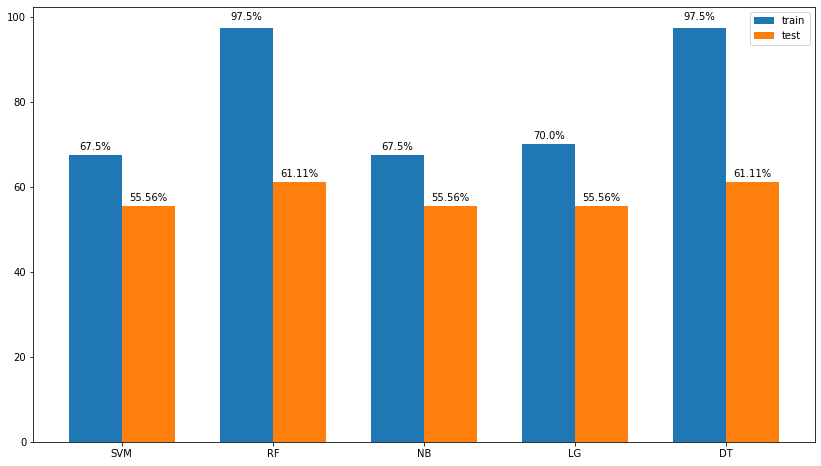

In [57]:
if __name__ == "__main__":
    retreived_tweets = get_data('OnePlus 8')
    train_tweets(retreived_tweets)